/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:09:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Model Accuracy: 1.00


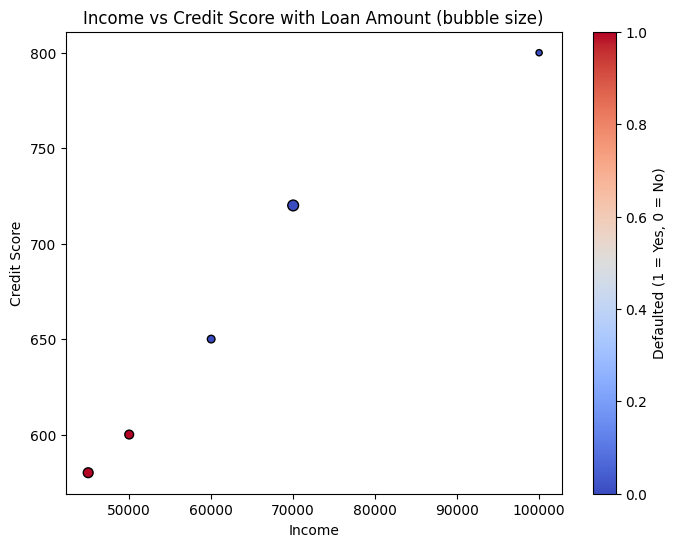

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Example customer loan data (simplified for this example)
data = {
    'income': [50000, 60000, 45000, 70000, 100000],
    'credit_score': [600, 650, 580, 720, 800],
    'loan_amount': [20000, 15000, 25000, 30000, 10000],
    'defaulted': [1, 0, 1, 0, 0]  # 1 = Defaulted, 0 = Paid on time
}

# Convert data into feature matrix X and labels y
X = [[income, credit, loan] for income, credit, loan in zip(data['income'], data['credit_score'], data['loan_amount'])]
y = data['defaulted']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into XGBoost's DMatrix
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the XGBoost model
xgb_model = xgb.train(params, train_data, num_boost_round=100)

# Make predictions
y_pred_prob = xgb_model.predict(test_data)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for income vs credit_score with loan_amount as size
plt.figure(figsize=(8,6))
plt.scatter(data['income'], data['credit_score'], s=[amt/500 for amt in data['loan_amount']], c=data['defaulted'], cmap="coolwarm", edgecolor="k")
plt.title('Income vs Credit Score with Loan Amount (bubble size)')
plt.xlabel('Income')
plt.ylabel('Credit Score')
plt.colorbar(label="Defaulted (1 = Yes, 0 = No)")
plt.show()


